Counterintuitive problem: Everyone in a room keeps giving dollars to random others. 
------------

from http://www.decisionsciencenews.com/2017/06/19/counterintuitive-problem-everyone-room-keeps-giving-dollars-random-others-youll-never-guess-happens-next/
    
Intentionally written in very basic python.

July, 2017 - Roger Allen

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

In [2]:
# There are 100 people
N=100
# They initially have 100 dollars each
dollars = [100]*N
# Every turn they transfer 1 dollar each through this array
temp_dollars = [0]*N

In [3]:
# initialize the arrays
def init():
    global dollars, temp_dollars
    dollars = [100]*N
    temp_dollars = [0]*N

# one step in the simulation
def step():
    global dollars, temp_dollars
    # everyone picks a random person to transfer their money to
    # go through a temporary array to avoid modifying the initial
    # state of the simulation step.  E.g if a person has $0 at the
    # start of the step, they shouldn't transfer money in that step.
    # But, without this temp array someone prior could transfer
    # money & they would be able to further move that money.
    for i in range(N):
        if dollars[i] > 0:
            j = randint(0,N-1) # randint is inclusive of top value
            while j == i: # you cannot give money to yourself
                j = randint(0,N-1) 
            temp_dollars[j] += 1  # credit a dollar to them
            temp_dollars[i] -= 1  # debit a dollar from yourself
    # actually do the transfers
    for i in range(N):
        dollars[i] += temp_dollars[i]
        temp_dollars[i] = 0

# show each person's number of dollars
def show():
    global dollars
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,6))
    ax1.plot(dollars)
    ax1.set_title("ordered by person")
    ax1.set_ylabel("$")
    sorted_dollars = sorted(dollars)
    ax2.plot(sorted_dollars)
    ax2.set_title("ordered by value")
    ax2.set_ylabel("$")


In [4]:
# initialize the simulation
init()

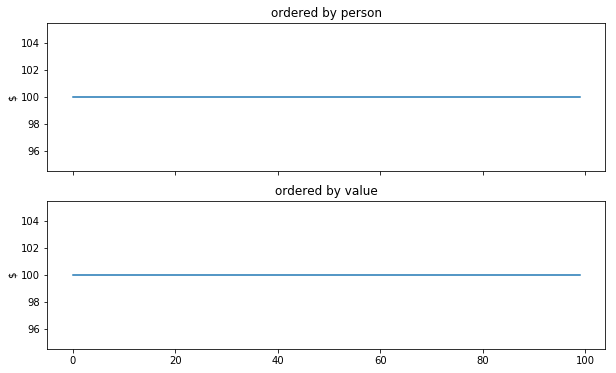

In [5]:
# show that everyone has the same amount of money
show()

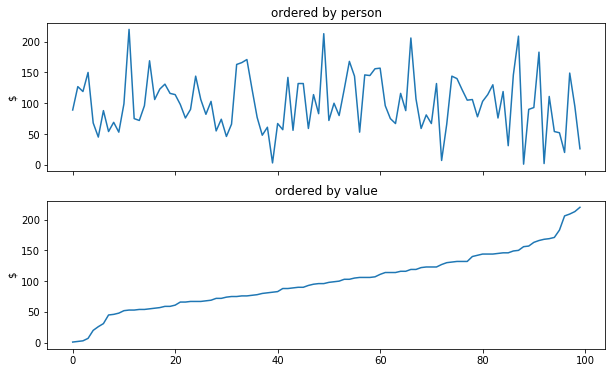

In [6]:
# simulate as many steps as you'd like
# repeatedly call this cell to see how it changes over time
for i in range(2000):
    step()
# show that an unequal distribution is the result of the random transfers.
# did you expect this?  or did you expect a more equal distribution?
show()